In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier # model
from xgboost import plot_importance as xgb_plot_importance# 중요변수 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model


from sklearn.metrics import roc_curve,confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_label = pd.read_csv('label_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_dropna = pd.read_csv('onehotdropna_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot.columns

Index(['age', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'marital_unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'university.degree', 'professional.course',
       'edu_unknown', 'default_no', 'default_yes', 'default_unknown',
       'house_no', 'house_yes', 'house_unknown', 'loan_no', 'loan_yes',
       'loan_unknown', 'pdays', 'previous', 'pout_no', 'pout_yes',
       'pout_unknown', 'y'],
      dtype='object')

In [9]:
def score(a,b,c):
    confusion = np.round(confusion_matrix(a,b),3)
    accuracy = np.round(accuracy_score(a,b),3)
    precision = np.round(precision_score(a,b),3)
    recall = np.round(recall_score(a,b),3)
    f1 = np.round(f1_score(a,b),3)
    
    roc_auc = np.round(roc_auc_score(a,b),3)
    
#     print(f'Confusion Matrix of {c}')
#     display(pd.DataFrame(confusion))
#     sns.heatmap(confusion, annot=True, fmt='d')
#     plt.show()
    
    return confusion,pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[c])

def classification(X,y,method = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    smote_sample = SMOTE(sampling_strategy=0.2) 
    X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    
    if method == 'under':
        X_train, y_train = X_under, y_under
    elif method == 'over':
        X_train, y_train = X_over, y_over
    elif method == 'smote':
        X_train, y_train = X_sm, y_sm

    model = Sequential()
    model.add(Dense(64,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(2,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn1 = model.predict(X_test)
    dnn1 = pd.DataFrame(data=dnn1).astype('float64')
    dnn1[0]=dnn1[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    model = Sequential()
    model.add(Dense(32,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn2 = model.predict(X_test)
    dnn2 = pd.DataFrame(data=dnn2).astype('float64')
    dnn2[0]=dnn2[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    model = Sequential()
    model.add(Dense(16,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn3 = model.predict(X_test)
    dnn3 = pd.DataFrame(data=dnn3).astype('float64')
    dnn3[0]=dnn3[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    model = Sequential()
    model.add(Dense(8,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn4 = model.predict(X_test)
    dnn4 = pd.DataFrame(data=dnn4).astype('float64')
    dnn4[0]=dnn4[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    model = Sequential()
    model.add(Dense(4,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn5 = model.predict(X_test)
    dnn5 = pd.DataFrame(data=dnn5).astype('float64')
    dnn5[0]=dnn5[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    confusion1,score1 = score(y_test,dnn1[0],'dnn')
    confusion2,score2  = score(y_test,dnn2[0],'dnn')
    confusion3,score3 = score(y_test,dnn3[0],'dnn')
    confusion4,score4  = score(y_test,dnn4[0],'dnn')
    confusion5,score5  = score(y_test,dnn5[0],'dnn')
    
    


        
    df = pd.concat([score1,score2,score3,score4,score5],axis=1)
    return np.round(df,3)

# 모델의 예측 성능 비교
## 원데이터 학습(샘플링 방식에 따라 구분)

None sampling


,dnn,dnn,dnn,dnn,dnn
accuracy,0.888,0.897,0.897,0.897,0.897
precision,0.000,0.629,0.624,0.624,0.628
recall,0.000,0.199,0.209,0.208,0.207
f1,0.000,0.302,0.313,0.312,0.311
roc_auc,0.500,0.592,0.596,0.596,0.596
score,0.000,0.740,0.741,0.740,0.744


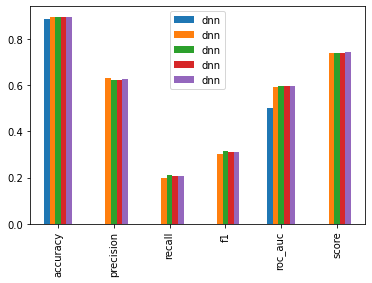

under sampling


,dnn,dnn,dnn,dnn,dnn
accuracy,0.797,0.736,0.725,0.656,0.636
precision,0.262,0.219,0.215,0.186,0.141
recall,0.446,0.526,0.544,0.612,0.438
f1,0.330,0.309,0.308,0.285,0.213
roc_auc,0.643,0.644,0.646,0.637,0.550
score,0.512,0.514,0.520,0.529,0.386


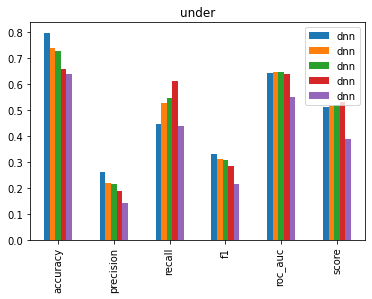

over sampling


,dnn,dnn,dnn,dnn,dnn
accuracy,0.888,0.807,0.750,0.725,0.759
precision,0.000,0.276,0.230,0.218,0.232
recall,0.000,0.441,0.521,0.557,0.497
f1,0.000,0.340,0.319,0.313,0.317
roc_auc,0.500,0.647,0.650,0.652,0.645
score,0.000,0.523,0.522,0.530,0.510


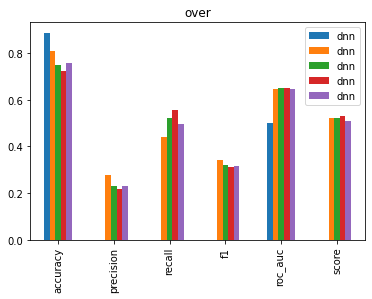

smote sampling


,dnn,dnn,dnn,dnn,dnn
accuracy,0.888,0.896,0.897,0.897,0.897
precision,0.000,0.606,0.617,0.623,0.638
recall,0.000,0.217,0.225,0.219,0.201
f1,0.000,0.320,0.329,0.324,0.306
roc_auc,0.500,0.600,0.603,0.601,0.593
score,0.000,0.728,0.743,0.746,0.751


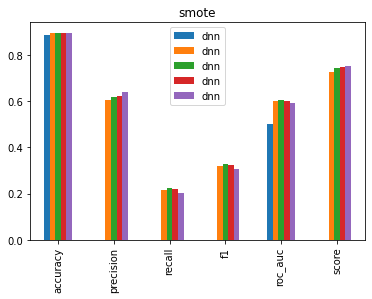

In [10]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

None sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.879,0.883,0.862,0.860,0.873,0.882
precision,0.637,0.645,0.594,0.646,0.422,0.398,0.511,0.614
recall,0.176,0.182,0.176,0.188,0.196,0.177,0.185,0.217
f1,0.276,0.284,0.271,0.292,0.268,0.245,0.272,0.321
roc_auc,0.581,0.584,0.579,0.587,0.578,0.569,0.579,0.599
score,0.736,0.747,0.693,0.751,0.532,0.497,0.615,0.736


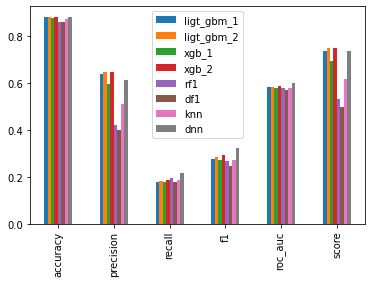

under sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.742,0.767,0.709,0.815,0.614,0.647,0.780,0.696
precision,0.237,0.259,0.221,0.322,0.181,0.184,0.256,0.221
recall,0.458,0.440,0.502,0.398,0.569,0.509,0.377,0.543
f1,0.313,0.326,0.307,0.356,0.274,0.270,0.305,0.314
roc_auc,0.621,0.628,0.621,0.637,0.595,0.588,0.608,0.631
score,0.493,0.505,0.502,0.545,0.500,0.469,0.467,0.525


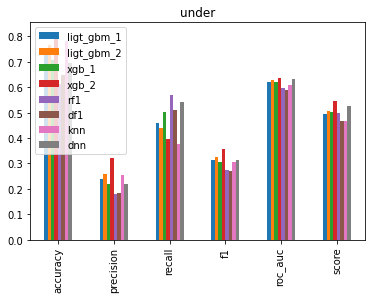

over sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.788,0.800,0.765,0.791,0.699,0.699,0.837,0.719
precision,0.282,0.301,0.249,0.286,0.193,0.184,0.338,0.233
recall,0.425,0.424,0.413,0.419,0.423,0.394,0.281,0.522
f1,0.339,0.352,0.311,0.340,0.265,0.251,0.307,0.322
roc_auc,0.633,0.639,0.615,0.633,0.581,0.569,0.600,0.635
score,0.520,0.538,0.480,0.521,0.430,0.405,0.495,0.525


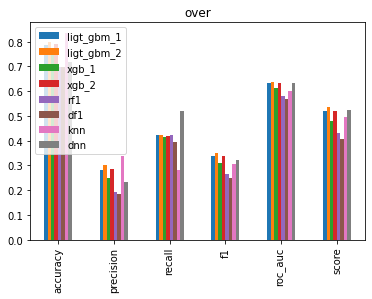

smote sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.881,0.879,0.882,0.860,0.856,0.867,0.882
precision,0.608,0.621,0.583,0.626,0.409,0.374,0.460,0.621
recall,0.197,0.194,0.188,0.194,0.206,0.187,0.223,0.207
f1,0.297,0.296,0.285,0.297,0.274,0.249,0.300,0.311
roc_auc,0.589,0.588,0.584,0.589,0.581,0.570,0.592,0.594
score,0.718,0.730,0.688,0.735,0.524,0.479,0.585,0.737


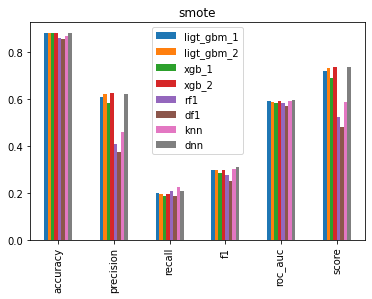

In [49]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

# 최적 모델 탐색
## 원데이터 학습(샘플링 방식에 따라 구분)

In [9]:
df_onehot_none = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'])
df_onehot_under = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'under')
df_onehot_over = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'over')
df_onehot_smote = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'smote')

In [10]:
def best_score(df,i):
    for j in i:
        dt = df.loc[j,:]
        a = pd.DataFrame(dt[dt==max(dt)])
        print(f'best of {j}:',dt[dt==max(dt)])
        print('')

        
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.898
Name: accuracy, dtype: float64

best of precision: xgb_2    0.645
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.307
Name: f1, dtype: float64

best of score: xgb_2    0.755
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.797
Name: accuracy, dtype: float64

best of precision: xgb_2    0.262
Name: precision, dtype: float64

best of recall: dnn    0.711
Name: recall, dtype: float64

best of f1: xgb_2    0.329
Name: f1, dtype: float64

best of score: dnn    0.566
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    0.482
Name: recall, dtype: float64

best of f1: ligt_gbm_2    0.336
Name: f1, dtype: float64

best of score: ligt_gbm_2    0.518
Name: score, dtype: float64

샘플링: 오버 s

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

In [11]:
df_dropna_none = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'])
df_dropna_under = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'under')
df_dropna_over = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'over')
df_dropna_smote = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'smote')

In [12]:
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.898
Name: accuracy, dtype: float64

best of precision: xgb_2    0.645
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.307
Name: f1, dtype: float64

best of score: xgb_2    0.755
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.797
Name: accuracy, dtype: float64

best of precision: xgb_2    0.262
Name: precision, dtype: float64

best of recall: dnn    0.711
Name: recall, dtype: float64

best of f1: xgb_2    0.329
Name: f1, dtype: float64

best of score: dnn    0.566
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    0.482
Name: recall, dtype: float64

best of f1: ligt_gbm_2    0.336
Name: f1, dtype: float64

best of score: ligt_gbm_2    0.518
Name: score, dtype: float64

샘플링: 오버 s

In [13]:
X= df_dropna.loc[:,:'pout_unknown']
y = df_dropna['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = Sequential()
model.add(Dense(64,input_dim = len(X_train.columns),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                      ,tf.keras.metrics.Recall(name='recall')
                      ,tf.keras.metrics.FalsePositives(name='false_positives')
                      ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                      ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])

history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)

model.save('dnn_model.h5')

model = 